In [8]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy import constants as c
from astropy.modeling.models import BlackBody

from astro530 import Planck, NIntegrate

In [9]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

In [31]:
def S_nu(tau, a):
    '''
    Inputs:
        tau - optical depth
        a - coefficients to the source function, array of length n
    Output:
        Source function Sum(a_n t^n)
    '''
    terms = np.zeros((len(a), len(tau)))
    for i in range(len(a)):
        terms[i] = a[i] * tau ** i
    return np.sum(terms, axis = 0)

def emergent_I(S_nu, a, mu = 1):
    
    tau = np.linspace(0, 100, 1000)
    
    integrand = S_nu(tau, a) * np.exp(-tau / mu) / mu
    
    return np.trapz(integrand, tau)
    

In [33]:
tau = np.linspace(0, 100, 1000)
I_0 = emergent_I(S_nu, a = [1, 1, 0.001])

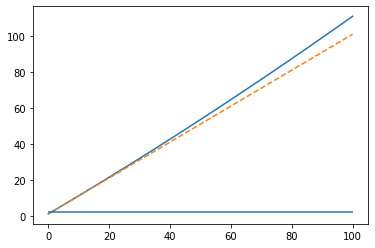

In [35]:
plt.plot(tau, S_nu(tau, a = [1, 1, 0.001]))
plt.plot(tau, 1 + tau, '--')
plt.hlines(I_0, 0, 100,)